## Comparing 230 grain Berger OTM Hybrid and Hornady A-Tip bullets

| Manufacturer  | Lot#        | Part#     | Item No. |
| ------------- | ----------- | --------- | -------- |
| Berger        | 1659        | 30112     |          |
| Hornady       | 2230118     |           | 3091     |

Measurements gathered using FX-120i scale.  
To simplify manual data entry, `projectlies.csv` only records the decimal portion, the script adds the whole number part.

In [7]:
#!pip3 install matplotlib scipy statsmodels

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a CSV file named 'projectiles.csv' and the data format is:
# Manufacturer, Projectile, Measurement
data = pd.read_csv('projectiles.csv')

In [9]:
def convert_measurement(decimal):
    """Measurement captures only the decimal values, this returns the full weight."""
    if 50 <= decimal < 100:
        return 229 + decimal / 100
    else:
        return 230 + decimal / 100


# Assuming 'Measurement' column contains the decimals
data["Measurement"] = data["Measurement"].apply(convert_measurement)

In [10]:
grouped = data.groupby(['Manufacturer', 'Projectile'])

print("Mean")
print(grouped['Measurement'].mean())
print("\nMedian")
print(grouped['Measurement'].median())
print("\nStandard Deviation")
print(grouped['Measurement'].std())


Mean
Manufacturer  Projectile
Berger        230 OTM       229.9028
Hornady       230 A-Tip     229.8482
Name: Measurement, dtype: float64

Median
Manufacturer  Projectile
Berger        230 OTM       229.90
Hornady       230 A-Tip     229.82
Name: Measurement, dtype: float64

Standard Deviation
Manufacturer  Projectile
Berger        230 OTM       0.043672
Hornady       230 A-Tip     0.084523
Name: Measurement, dtype: float64


<Figure size 1200x600 with 0 Axes>

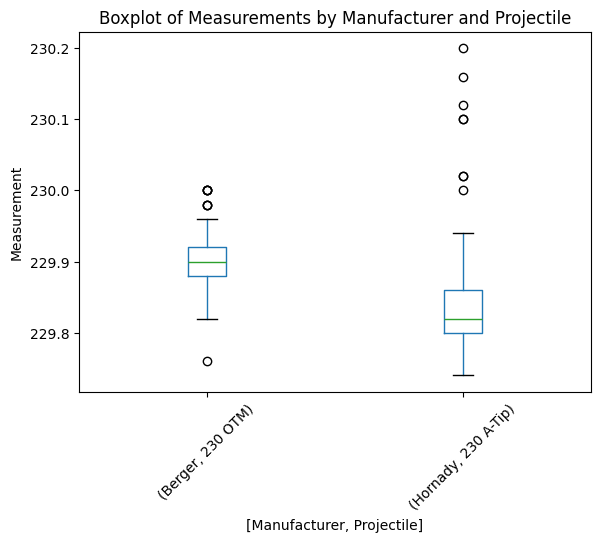

In [11]:
plt.figure(figsize=(12,6))
ax = data.boxplot(column='Measurement', by=['Manufacturer', 'Projectile'], grid=False)
ax.set_title('Boxplot of Measurements by Manufacturer and Projectile')
plt.suptitle('') # removes pandas-generated title
plt.ylabel('Measurement')
plt.xticks(rotation=45)
plt.show()


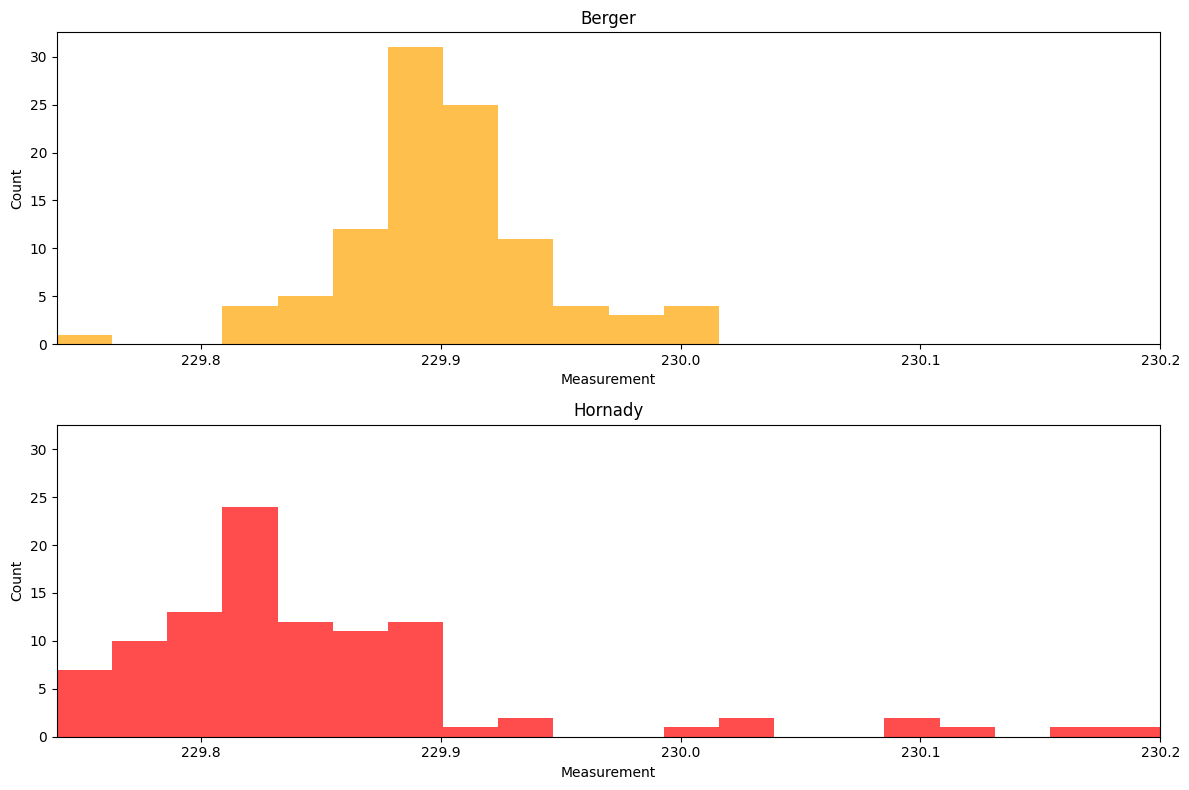

In [12]:
# Determine global min and max
min_val = data['Measurement'].min()
max_val = data['Measurement'].max()

# Create bins
bin_edges = np.linspace(min_val, max_val, 21)  # 20 bins means 21 edges

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharey=True)  # Removed sharex=True

manufacturers = data['Manufacturer'].unique()

for i, manufacturer in enumerate(manufacturers):
    subset = data[data['Manufacturer'] == manufacturer]
    axs[i].hist(subset['Measurement'], bins=bin_edges, alpha=0.7, color=['orange', 'red'][i])
    axs[i].set_title(manufacturer)
    axs[i].set_xlabel('Measurement')
    axs[i].set_ylabel('Count')
    axs[i].set_xlim(min_val, max_val)  # Explicitly set x-axis limits

plt.tight_layout()
plt.show()
